In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/xmakai00/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#each claim on as individual data
df = pd.read_csv('./data/dataset_comments.csv')
print(df.info())
df.drop(columns=['comment_id'], inplace=True)
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   comment_id        130 non-null    int64 
 1   comment           130 non-null    object
 2   related_comments  130 non-null    object
 3   claim_id          130 non-null    object
 4   claim             130 non-null    object
 5   source            130 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.2+ KB
None


,comment,related_comments,claim_id,claim,source
count,130,130,130,130,130
unique,60,38,97,130,14
top,"To není ani o ekologii, ale o ekonomice. Nic p...",[],106921312_2,CO2 je toxická zplodina.,Nejpřísnější zákaz dieselů Německa staví na od...
freq,8,41,7,1,45


count     60.000000
mean      40.766667
std       28.629940
min        8.000000
25%       20.000000
50%       30.000000
75%       54.250000
max      119.000000
Name: comment_len, dtype: float64


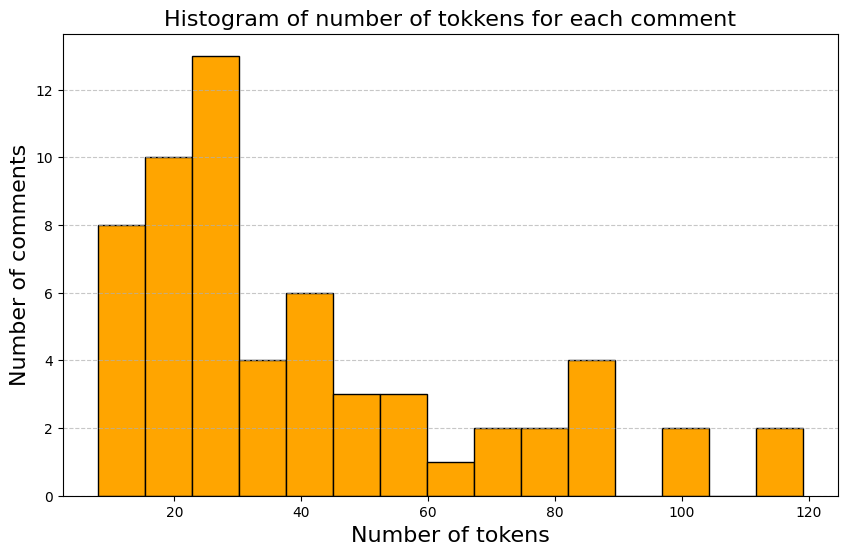

In [3]:
#create sources df
df_comments = pd.DataFrame(df['comment'].unique(), columns=['comment'])
df_comments['comment_tokens'] = df_comments['comment'].apply(lambda x: nltk.word_tokenize(x))
df_comments['comment_len'] = df_comments['comment_tokens'].apply(len)
print(df_comments['comment_len'].describe())
# Plot a histogram of word token counts
plt.figure(figsize=(10, 6))
plt.hist(df_comments['comment_len'], bins=15, color='orange', edgecolor='black')
plt.title('Histogram of number of tokkens for each comment', fontsize=16)
plt.xlabel('Number of tokens',fontsize=16)
plt.ylabel('Number of comments',fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

count    130.000000
mean      10.507692
std        3.692116
min        4.000000
25%        8.000000
50%       10.000000
75%       12.000000
max       24.000000
Name: claim_token_counts, dtype: float64


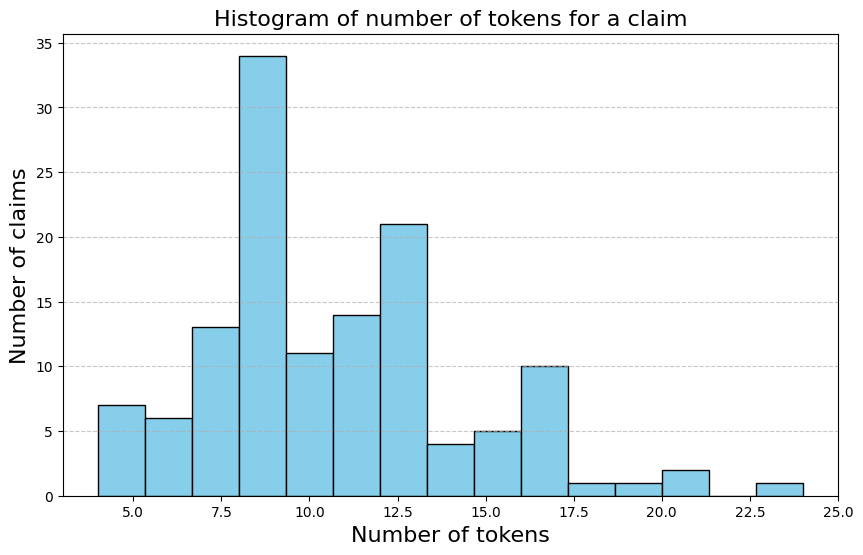

count    130.000000
mean       3.092308
std        1.886082
min        1.000000
25%        2.000000
50%        2.500000
75%        4.000000
max        8.000000
Name: claim_count, dtype: float64


In [ ]:
df['claim_tokens'] = df['claim'].apply(lambda x: nltk.word_tokenize(x))
df['claim_token_counts'] = df['claim_tokens'].apply(len)
#describe only the claim column
print(df['claim_token_counts'].describe())

# Plot a histogram of word token counts
plt.figure(figsize=(10, 6))
plt.hist(df['claim_token_counts'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of number of tokens for a claim', fontsize=16)
plt.xlabel('Number of tokens',fontsize=16)
plt.ylabel('Number of claims',fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [5]:
#group by unique comment and comment_id
df_grouped = df.drop(columns=['claim_tokens', 'related_comments'])
df_grouped = df_grouped.groupby(['comment']).agg({
    'claim': lambda x: '; '.join(x.astype(str)),
    'source': 'first',
    'claim_token_counts': lambda x: '; '.join(x.astype(str)),
    'claim_id': lambda x: '; '.join(x.astype(str)),
}).reset_index()
df_grouped['claim'] = df_grouped['claim'].apply(lambda x: x.split('; '))
df_grouped['claim_id'] = df_grouped['claim_id'].apply(lambda x: x.split('; '))
df_grouped['claim_token_counts'] = df_grouped['claim_token_counts'].apply(lambda x: x.split('; '))
df_grouped.info()
df_grouped.head()

#save to json
with open('data/comments_grouped.json', 'w', encoding='utf-8') as f:
    json.dump(df_grouped.to_dict(orient='records'), f, ensure_ascii=True, indent=4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comment             60 non-null     object
 1   claim               60 non-null     object
 2   source              60 non-null     object
 3   claim_token_counts  60 non-null     object
 4   claim_id            60 non-null     object
dtypes: object(5)
memory usage: 2.5+ KB
